In [5]:
import cv2
import numpy as np
import pywt
import cv2
import matplotlib.pyplot as plt

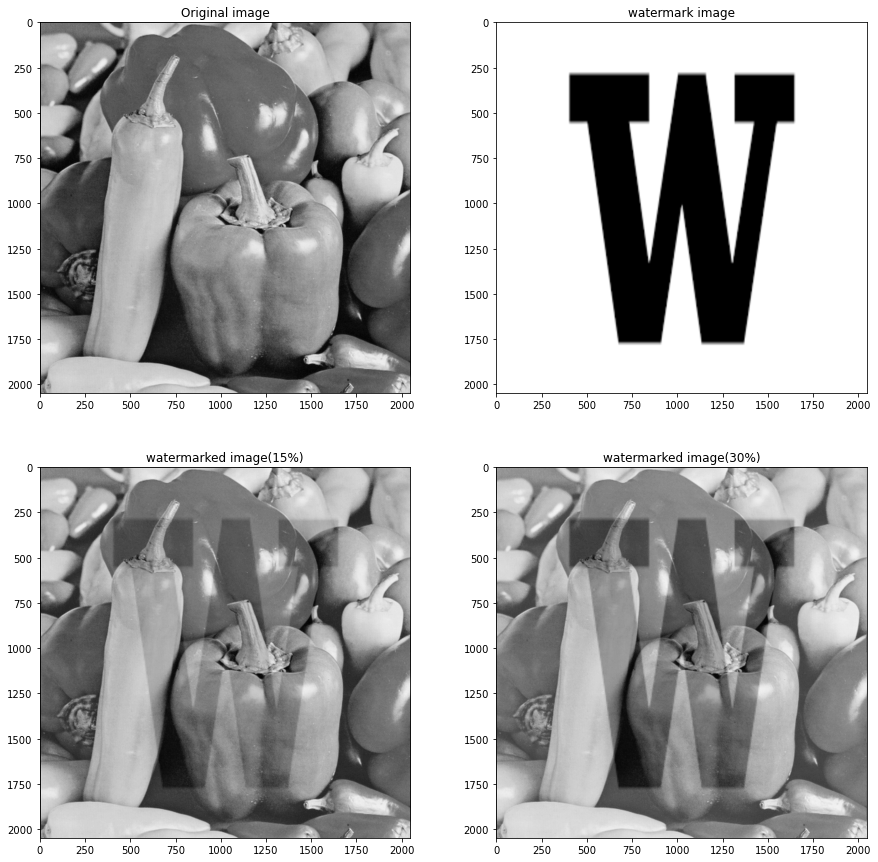

In [6]:
# Load the original image and the watermark image
img = cv2.imread('image_3.png', cv2.IMREAD_GRAYSCALE)
watermark = cv2.imread('watermark.png', cv2.IMREAD_GRAYSCALE)

# # Resize the watermark image to match the size of the original image
watermark = cv2.resize(watermark, (img.shape[1], img.shape[0]))

# Create a copy of the original image
img_copy = np.copy(img)

# Calculate the position to paste the watermark in the middle of the image
watermark_pos = ((img_copy.shape[1] - watermark.shape[1]) // 2,
                 (img_copy.shape[0] - watermark.shape[0]) // 2)

# Paste the watermark in the middle of the copied image
img_copy[watermark_pos[1]:watermark_pos[1]+watermark.shape[0],
         watermark_pos[0]:watermark_pos[0]+watermark.shape[1]] = watermark

# Apply DWT to the original image and the watermarked image
coeffs = pywt.dwt2(img, 'haar')
watermark_coeffs = pywt.dwt2(img_copy, 'haar')

# Extract the approximation and detail coefficients from the original image
cA, (cH, cV, cD) = coeffs

# Extract the approximation coefficient from the watermarked image
cA_wm, _ = watermark_coeffs

# Embed the watermark by adding the approximation coefficients of the watermark to the original image
alpha_1, alpha_2 = 0.15 , 0.3  # Scaling factor for the watermark
cA_wm_embedded_1 = cA + alpha_1*cA_wm
cA_wm_embedded_2 = cA + alpha_2*cA_wm

# Perform IDWT on the watermarked image
watermarked_coeffs_1 = (cA_wm_embedded_1, (cH, cV, cD))
watermarked_img_1 = pywt.idwt2(watermarked_coeffs_1, 'haar')

watermarked_coeffs_2 = (cA_wm_embedded_2, (cH, cV, cD))
watermarked_img_2 = pywt.idwt2(watermarked_coeffs_2, 'haar')


# plotting the image 
fig, ax = plt.subplots(2, 2, figsize=(15,15))
ax[0,0].imshow(img, cmap='gray')
ax[0,0].set_title("Original image")

ax[0,1].imshow(watermark, cmap='gray')
ax[0,1].set_title("watermark image")

ax[1,0].imshow(watermarked_img_1, cmap='gray')
ax[1,0].set_title("watermarked image(15%)")

ax[1,1].imshow(watermarked_img_2, cmap='gray')
ax[1,1].set_title("watermarked image(30%)")

plt.show();
